<a href="https://colab.research.google.com/github/Btwo2/PythonNeedleDetector/blob/main/Needle_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Top Hat Sem Otsu com Crop 10%

1 (2608, 1952)

(2) Lighting Correction with Top-Hat Operation
Elapsed time: 0.921s


(3) Thresholding
2 (2608, 1952)

(2) Lighting Correction with Top-Hat Operation
Elapsed time: 0.930s


(3) Thresholding


error: ignored

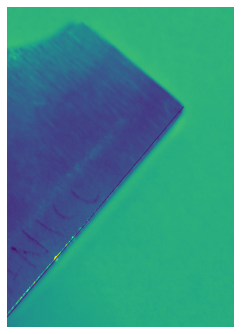

In [ ]:
# clear existing user defined variables
for element in dir():
    if element[0:2] != "__":
        del globals()[element]

from time import time
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


# ==============================================================
# ==============================================================
# IMAGE PREPROCESSING FOR BACKGROUND / FOREGROUND SEGMENTATION
# ==============================================================
# ==============================================================

f = plt.figure(figsize=(20,20))
for j in range(1, 12):

  img = cv.imread('f ('+ str(j) +').jpg', cv.IMREAD_COLOR)

  h0 = int(img.shape[0]/10)
  h1 = 9*h0
  l0 = int(img.shape[1]/10)
  l1 = 9*l0

  img = img[h0:h1, l0:l1]

  gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # to grayscale

  print(j, gray.shape)

  # =========================================================
  print('\n(2) Lighting Correction with Top-Hat Operation')
  # =========================================================
  t1 = time()

  # TOP-HAT OPERATION
  # every image detail smaller than the structuring element (circle of size `kernel_size`)
  # will be kept; other larger details will be wiped out

  # Define Structuring Element
  # cv.MORPH_ELLIPSE, cv.MORPH_CROSS, cv.MORPH_RECT
  kernel_size = 71
  kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(kernel_size,kernel_size))

  # top hat operation considers that white is image elements and black is background,
  # the oposite of our case, thus we invert the image
  gray = 255-gray

  # apply top-hat
  dst = cv.morphologyEx(gray, cv.MORPH_TOPHAT, kernel)

  # undo inversion
  dst = 255-dst

  t2 = time()
  print('Elapsed time: {:.3f}s\n'.format(t2-t1))

  # Find the edges in the image using canny detector
  edges = cv.Canny(dst, 50, 75)

  # Detect points that form a line
  lines = cv.HoughLinesP(edges, 1, np.pi/180, 200, minLineLength=1, maxLineGap=250)

  # Detect dominant color
  #from colorthief import ColorThief
  #color_thief = ColorThief('an-c.png')
  #dominant_color = color_thief.get_color(quality=1)

  xe = []
  ye = []
  xd = []
  yd = []

  i = 0

  delta = 400

  for line in lines:
      x1, y1, x2, y2 = line[0]
      xe.append(x1)
      ye.append(y1)
      xd.append(x2)
      yd.append(y2)

  cv.line(img, (xe[i], ye[i]), (xd[i], yd[i]), (255, 0, 0), 2)

  if ye[i] < yd[i]:
    crop = img[ye[i]-delta:yd[i]+delta, xe[i]:xd[i]+delta]
  else:
    crop = img[yd[i]-delta:ye[i]+delta, xe[i]:xd[i]+delta]

  # ============================================
  print('\n(3) Thresholding')
  # ============================================
  t1 = time()

 #crop = cv.blur(crop,(11,11))

  crop = cv.cvtColor(crop, cv.COLOR_BGR2GRAY) # to grayscale

  # cv.THRESH_BINARY, cv.THRESH_BINARY_INV, cv.THRESH_OTSU
  (_, dst) = cv.threshold(crop, 0, 255, cv.THRESH_OTSU)

  kernel_size = 40
  kernel = cv.getStructuringElement(cv.MORPH_CROSS,(kernel_size,kernel_size))

  # top hat operation considers that white is image elements and black is background,
  # the oposite of our case, thus we invert the image
  gray = 255-gray

  # apply top-hat
  dst = cv.morphologyEx(dst, cv.MORPH_TOPHAT, kernel)

  # Show result

  f.add_subplot(3,4,j+1)
  plt.imshow(crop)
  plt.axis("off");
plt.savefig("QE.png")
plt.show()

if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()
# ---------------------------------------------------

In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
uploaded = files.upload()

Saving foto0.jpg to foto0.jpg


1 
 (4032, 3024)

(2) Lighting Correction with Top-Hat Operation
Elapsed time: 0.084s

(3) Thresholding
Elapsed time: 0.000s
2 
 (4032, 3024)

(2) Lighting Correction with Top-Hat Operation
Elapsed time: 0.077s

(3) Thresholding
Elapsed time: 0.000s
3 
 (4032, 3024)

(2) Lighting Correction with Top-Hat Operation
Elapsed time: 0.080s

(3) Thresholding
Elapsed time: 0.000s
4 
 (4032, 3024)

(2) Lighting Correction with Top-Hat Operation
Elapsed time: 0.077s

(3) Thresholding
Elapsed time: 0.000s
5 
 (4032, 3024)

(2) Lighting Correction with Top-Hat Operation
Elapsed time: 0.076s

(3) Thresholding
Elapsed time: 0.000s
6 
 (4032, 3024)

(2) Lighting Correction with Top-Hat Operation
Elapsed time: 0.080s

(3) Thresholding
Elapsed time: 0.000s
7 
 (4032, 3024)

(2) Lighting Correction with Top-Hat Operation
Elapsed time: 0.082s

(3) Thresholding
Elapsed time: 0.000s
8 
 (4032, 3024)

(2) Lighting Correction with Top-Hat Operation
Elapsed time: 0.075s

(3) Thresholding
Elapsed time: 0.000s


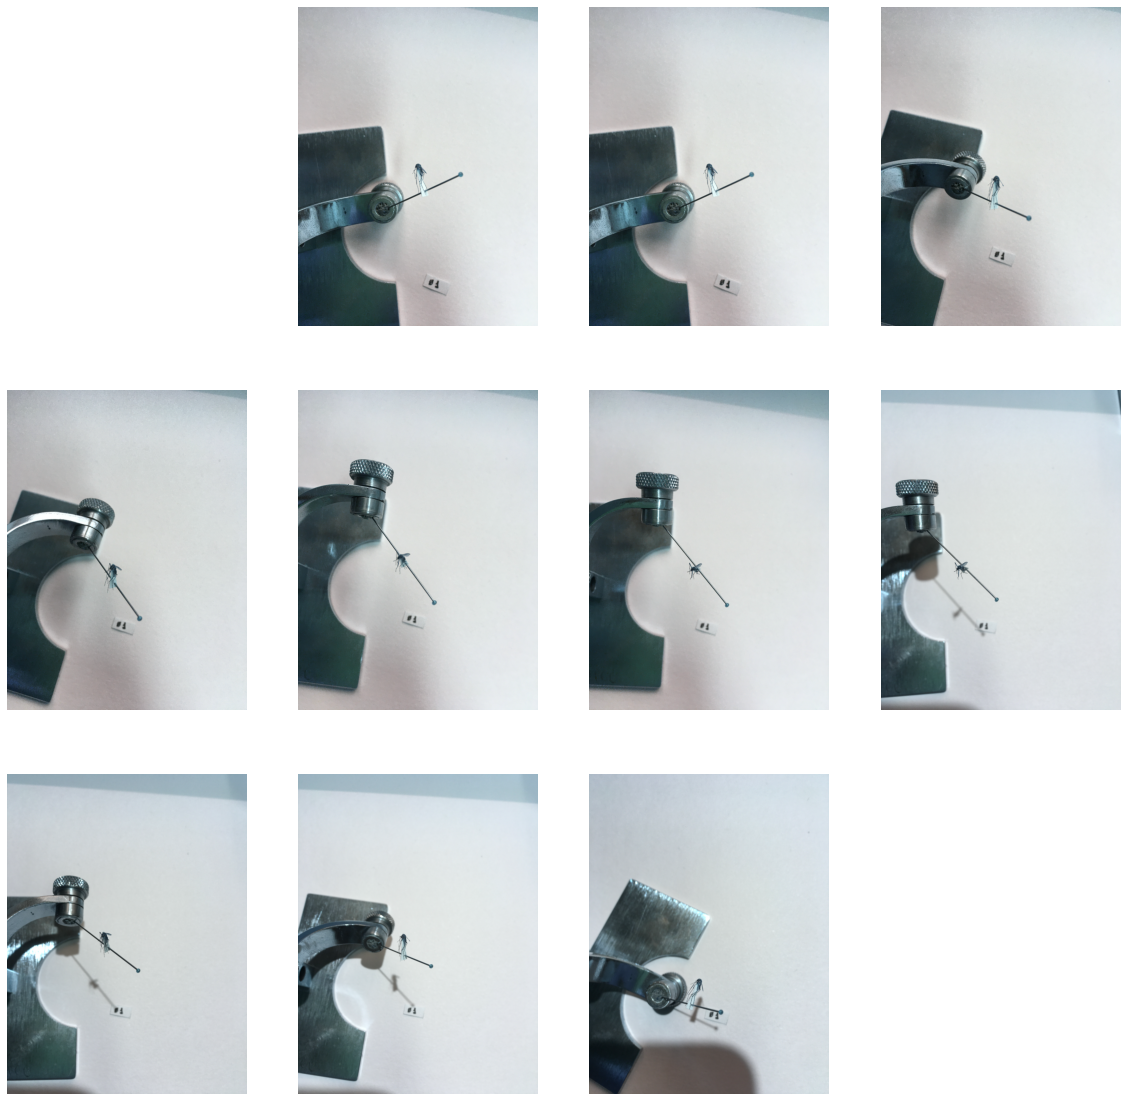

In [ ]:
# clear existing user defined variables
for element in dir():
    if element[0:2] != "__":
        del globals()[element]

from time import time
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


# ==============================================================
# ==============================================================
# IMAGE PREPROCESSING FOR BACKGROUND / FOREGROUND SEGMENTATION
# ==============================================================
# ==============================================================

f = plt.figure(figsize=(20,20)) #image plot size
for j in range(1, 11):

  img = cv.imread('foto'+ str(j) +'.jpg', cv.IMREAD_COLOR)

  h0 = int(img.shape[0]/10)
  h1 = 9*h0
  l0 = int(img.shape[1]/10)
  l1 = 9*l0

  #img = img[h0:h1, l0:l1]

  gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # to grayscale

  gray = cv.blur(gray,(3,3))

  print(j,'\n', gray.shape)

  # =========================================================
  print('\n(2) Lighting Correction with Top-Hat Operation')
  # =========================================================
  t1 = time()

  # TOP-HAT OPERATION
  # every image detail smaller than the structuring element (circle of size `kernel_size`)
  # will be kept; other larger details will be wiped out

  # Define Structuring Element
  # cv.MORPH_ELLIPSE, cv.MORPH_CROSS, cv.MORPH_RECT
  kernel_size = 40
  kernel = cv.getStructuringElement(cv.MORPH_CROSS,(kernel_size,kernel_size))

  # top hat operation considers that white is image elements and black is background,
  # the oposite of our case, thus we invert the image
  gray = 255-gray

  # apply top-hat
  dst = cv.morphologyEx(gray, cv.MORPH_TOPHAT, kernel)

  # undo inversion
  dst = 255-dst

  t2 = time()
  print('Elapsed time: {:.3f}s\n'.format(t2-t1))

  # ============================================
  print('(3) Thresholding')
  # ============================================
  t1 = time()

  # cv.THRESH_BINARY, cv.THRESH_BINARY_INV, cv.THRESH_OTSU
  #(_, edges) = cv.threshold(dst, 255, 50, cv.THRESH_OTSU)

  t2 = time()
  print('Elapsed time: {:.3f}s'.format(t2-t1))

  # Find the edges in the image using canny detector
  #edges = cv.Canny(dst, 25, 75)
  edges = cv.bitwise_not(dst)
  edges = cv.Canny(edges, 25, 75)

  # Detect points that form a line
  lines = cv.HoughLinesP(edges, 1, np.pi/180, 200, minLineLength=1, maxLineGap=250)

  # Detect dominant color
  #from colorthief import ColorThief
  #color_thief = ColorThief('an-c.png')
  #dominant_color = color_thief.get_color(quality=1)

  xe = []
  ye = []
  xd = []
  yd = []

  i = 0

  delta = 400

  for line in lines:
      x1, y1, x2, y2 = line[0]
      xe.append(x1)
      ye.append(y1)
      xd.append(x2)
      yd.append(y2)

  #cv.line(img, (xe[i], ye[i]), (xd[i], yd[i]), (255, 0, 0), 2)

  if ye[i] < yd[i]:
    crop = img[ye[i]-delta:yd[i]+delta, xe[i]:xd[i]+delta]
  else:
    crop = img[yd[i]-delta:ye[i]+delta, xe[i]:xd[i]+delta]

# Show result
#img = cv2.resize(img, dsize=(600, 600))

  f.add_subplot(3,4,j+1)
  plt.imshow(img)
  plt.axis("off");
plt.savefig("QE.png")
plt.show()

if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()
# ---------------------------------------------------

(3264, 2448)

(2) Lighting Correction with Top-Hat Operation
Elapsed time: 1.777s


(3) Thresholding
Elapsed time: 0.007s


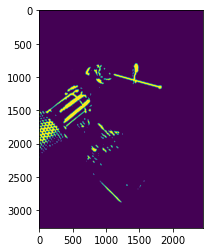

In [ ]:
# clear existing user defined variables
for element in dir():
    if element[0:2] != "__":
        del globals()[element]

from time import time
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# ==============================================================
# ==============================================================
# IMAGE PREPROCESSING FOR BACKGROUND / FOREGROUND SEGMENTATION
# ==============================================================
# ==============================================================

img = cv.imread('f (1).jpg', cv.IMREAD_COLOR)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # to grayscale

gray = cv.blur(gray,(21,21))

print(gray.shape)

# =========================================================
print('\n(2) Lighting Correction with Top-Hat Operation')
# =========================================================
t1 = time()

# TOP-HAT OPERATION
# every image detail smaller than the structuring element (circle of size `kernel_size`)
# will be kept; other larger details will be wiped out

# Define Structuring Element
# cv.MORPH_ELLIPSE, cv.MORPH_CROSS, cv.MORPH_RECT
kernel_size = 71
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(kernel_size,kernel_size))

# top hat operation considers that white is image elements and black is background,
# the oposite of our case, thus we invert the image
gray = 255-gray

# apply top-hat
dst = cv.morphologyEx(gray, cv.MORPH_TOPHAT, kernel)

t2 = time()
print('Elapsed time: {:.3f}s\n'.format(t2-t1))

# ============================================
print('\n(3) Thresholding')
# ============================================
t1 = time()

# cv.THRESH_BINARY, cv.THRESH_BINARY_INV, cv.THRESH_OTSU
(_, dst) = cv.threshold(dst, 0, 255, cv.THRESH_OTSU)

t2 = time()
print('Elapsed time: {:.3f}s'.format(t2-t1))

plt.imshow(dst)

if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()


(2) Lighting Correction with Top-Hat Operation


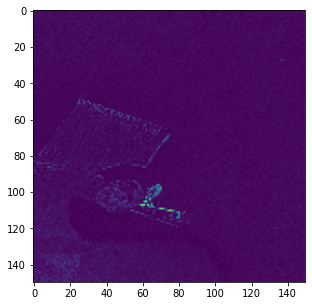

In [ ]:
# Python program to illustrate
# Otsu thresholding type on an image

# organizing imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

# path to input image is specified and
# image is loaded with imread command
image1 = cv2.imread('foto1.jpg')

# cv2.cvtColor is applied over the
# image input with applied parameters
# to convert the image in grayscale
img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

# =========================================================
print('\n(2) Lighting Correction with Top-Hat Operation')
# =========================================================
t1 = time()

# TOP-HAT OPERATION
# every image detail smaller than the structuring element (circle of size `kernel_size`)
# will be kept; other larger details will be wiped out

# Define Structuring Element
# cv.MORPH_ELLIPSE, cv.MORPH_CROSS, cv.MORPH_RECT
kernel_size = 30
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(kernel_size,kernel_size))

# top hat operation considers that white is image elements and black is background,
# the oposite of our case, thus we invert the image
gray = 255-gray

# apply top-hat
dst = cv.morphologyEx(gray, cv.MORPH_TOPHAT, kernel)

# undo inversion
#dst = 255-dst

dst = cv.resize(dst, dsize=(150, 150))

# the window showing output image
# with the corresponding thresholding
# techniques applied to the input image
plt.imshow(dst)

# De-allocate any associated memory usage
if cv2.waitKey(0) & 0xff == 27:
	cv2.destroyAllWindows()


(3024, 2268)

(2) Lighting Correction with Top-Hat Operation
Elapsed time: 1.678s


(3) Thresholding
Elapsed time: 0.006s


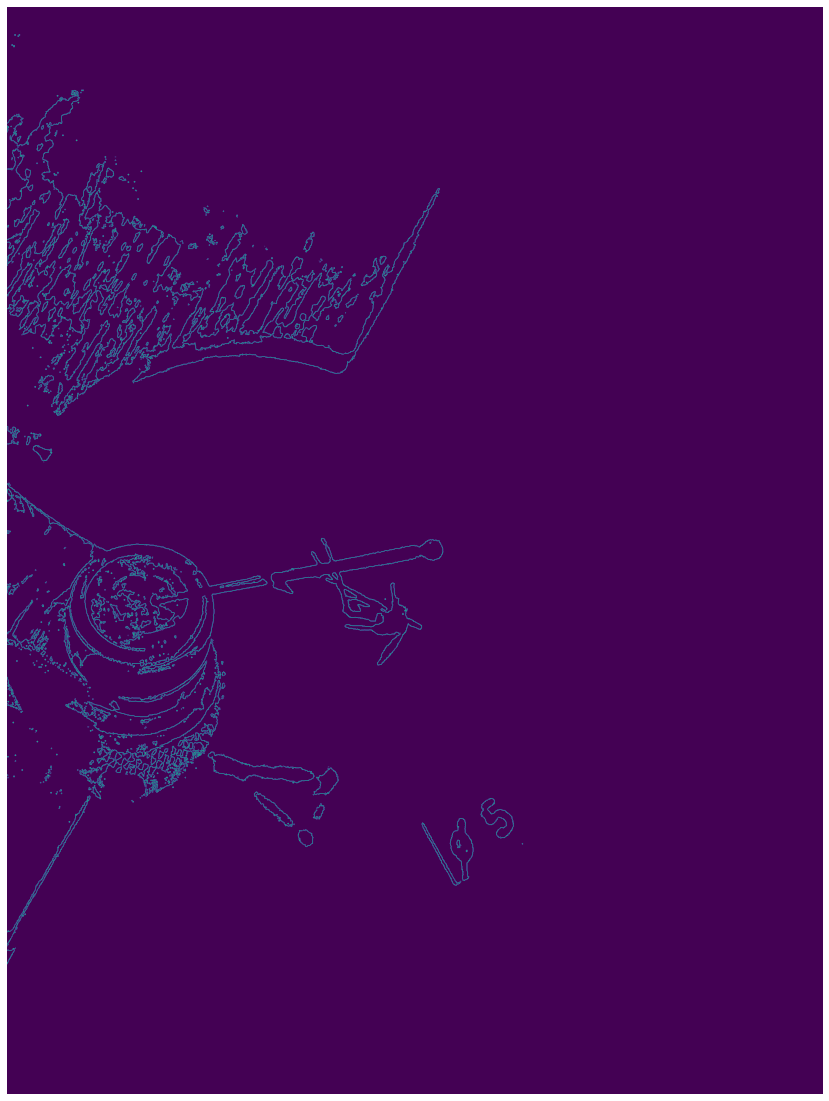

In [ ]:
# clear existing user defined variables
for element in dir():
    if element[0:2] != "__":
        del globals()[element]

from time import time
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


# ==============================================================
# ==============================================================
# IMAGE PREPROCESSING FOR BACKGROUND / FOREGROUND SEGMENTATION
# ==============================================================
# ==============================================================

f = plt.figure(figsize=(20,20))

img = cv.imread('M5 (6).jpg', cv.IMREAD_COLOR)

h0 = int(img.shape[0]/8)
h1 = 7*h0
l0 = int(img.shape[1]/8)
l1 = 7*l0

img = img[h0:h1, l0:l1]

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # to grayscale

print(gray.shape)

# =========================================================
print('\n(2) Lighting Correction with Top-Hat Operation')
# =========================================================
t1 = time()

# TOP-HAT OPERATION
# every image detail smaller than the structuring element (circle of size `kernel_size`)
# will be kept; other larger details will be wiped out

# Define Structuring Element
# cv.MORPH_ELLIPSE, cv.MORPH_CROSS, cv.MORPH_RECT
kernel_size = 71
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(kernel_size,kernel_size))

# top hat operation considers that white is image elements and black is background,
# the oposite of our case, thus we invert the image
gray = 255-gray

# apply top-hat
dst = cv.morphologyEx(gray, cv.MORPH_TOPHAT, kernel)

# undo inversion
dst = 255-dst

t2 = time()
print('Elapsed time: {:.3f}s\n'.format(t2-t1))

# ============================================
print('\n(3) Thresholding')
# ============================================
t1 = time()

# cv.THRESH_BINARY, cv.THRESH_BINARY_INV, cv.THRESH_OTSU
(_, dst) = cv.threshold(dst, 0, 255, cv.THRESH_OTSU)

t2 = time()
print('Elapsed time: {:.3f}s'.format(t2-t1))

# Find the edges in the image using canny detector
edges = cv.Canny(dst, 0, 10)

# Detect points that form a line
lines = cv.HoughLinesP(edges, 1, np.pi/180, 200, minLineLength=1, maxLineGap=250)

# Detect dominant color
#from colorthief import ColorThief
#color_thief = ColorThief('an-c.png')
#dominant_color = color_thief.get_color(quality=1)

xe = []
ye = []
xd = []
yd = []

i = 0

delta = 400

for line in lines:
    x1, y1, x2, y2 = line[0]
    xe.append(x1)
    ye.append(y1)
    xd.append(x2)
    yd.append(y2)

cv.line(img, (xe[i], ye[i]), (xd[i], yd[i]), (255, 0, 0), 2)

if ye[i] < yd[i]:
  crop = img[ye[i]-delta:yd[i]+delta, xe[i]:xd[i]+delta]
else:
  crop = img[yd[i]-delta:ye[i]+delta, xe[i]:xd[i]+delta]

# Show result
#img = cv2.resize(img, dsize=(600, 600))

  plt.imshow( edges)
  plt.axis("off");
plt.savefig("QE.png")
plt.show()

if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()
# ---------------------------------------------------